# GOOG

---

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot
import hvplot.pandas
from IPython.display import Markdown

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 1000)

### Read CSV into Pandas DataFrame

In [2]:
# Set the file path
filepath = Path("GOOG.csv")

# Read the CSV located at the file path into a Pandas DataFrame
GOOG_df = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

# Print the DataFrame
GOOG_df.head()

Date        Open        High         Low       Close   Adj Close   Volume
0  2016-04-19  769.510010  769.900024  749.330017  753.929993  753.929993  2030500
1  2016-04-20  758.000000  758.132019  750.010010  752.669983  752.669983  1529200
2  2016-04-21  755.380005  760.450012  749.549988  759.140015  759.140015  3060500
3  2016-04-22  726.299988  736.119995  713.609985  718.770020  718.770020  5951900
4  2016-04-25  716.099976  723.929993  715.590027  723.150024  723.150024  1959200

In [4]:
GOOG_df.tail()

Date         Open         High          Low        Close    Adj Close   Volume
1253  2021-04-12  2266.250000  2275.320068  2238.465088  2254.790039  2254.790039  1565900
1254  2021-04-13  2261.469971  2277.209961  2256.090088  2267.270020  2267.270020  1165500
1255  2021-04-14  2275.159912  2277.989990  2249.189941  2254.840088  2254.840088  1011000
1256  2021-04-15  2276.979980  2306.596924  2266.000000  2296.659912  2296.659912  1373600
1257  2021-04-16  2303.000000  2306.439941  2284.449951  2297.760010  2297.760010  1129800

# ______Algorithmic Trading_____

### Generate a Dual Moving Average Crossover Trading Signal

In [5]:
# Grab just the `date` and `close` from the IEX dataset
signals_df = GOOG_df.loc[:, ['Date', 'Close']].copy()

# Set the `date` column as the index
signals_df = signals_df.set_index("Date", drop=True)

# Set the short window and long windows
short_window = 50
long_window = 200

so_window = 20
loo_window = 70

st_window = 30
lg_window = 120


# Generate the short and long moving averages (50 and 100 days, respectively)
signals_df['SMA50'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA200'] = signals_df['Close'].rolling(window=long_window).mean()

signals_df['SMA20'] = signals_df['Close'].rolling(window=so_window).mean()
signals_df['SMA70'] = signals_df['Close'].rolling(window=loo_window).mean()

signals_df['SMA30'] = signals_df['Close'].rolling(window=st_window).mean()
signals_df['SMA120'] = signals_df['Close'].rolling(window=lg_window).mean()

signals_df['Signal_50_200'] = 0.0
signals_df['Signal_20_70'] = 0.0
signals_df['Signal_30_120'] = 0.0

# Generate the trading signal 0 or 1,
# where 0 is when the SMA50 is under the SMA100, and
# where 1 is when the SMA50 is higher (or crosses over) the SMA100

signals_df['Signal_50_200'][short_window:] = np.where(
    signals_df['SMA50'][short_window:] > signals_df['SMA200'][short_window:], 1.0, 0.0)

signals_df['Signal_20_70'][short_window:] = np.where(
    signals_df['SMA20'][short_window:] > signals_df['SMA70'][short_window:], 1.0, 0.0)

signals_df['Signal_30_120'][short_window:] = np.where(
    signals_df['SMA30'][short_window:] > signals_df['SMA120'][short_window:], 1.0, 0.0)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df['Entry/Exit_50_200'] = signals_df['Signal_50_200'].diff()

signals_df['Entry/Exit_20_70'] = signals_df['Signal_20_70'].diff()

signals_df['Entry/Exit_30_120'] = signals_df['Signal_30_120'].diff()

# Print the DataFrame
signals_df.tail(10)

Close        SMA50       SMA200        SMA20        SMA70        SMA30       SMA120  Signal_50_200  Signal_20_70  Signal_30_120  Entry/Exit_50_200  Entry/Exit_20_70  Entry/Exit_30_120
Date                                                                                                                                                                                                     
2021-04-05  2225.550049  2045.716797  1719.319597  2069.901996  1965.981998  2067.962000  1858.630833            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-06  2224.750000  2052.190796  1723.263547  2079.930994  1973.142712  2073.291003  1864.094166            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-07  2249.679932  2059.196394  1727.353347  2089.779993  1980.532711  2079.251664  1869.744165            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-08  2265.439941  2066.160393  1731.421246  2100.300488  1988.055425  2084.927332  1875.555498            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-09  2285.879883  2075.262190  1735.528596  2108.855981  1995.338138  2093.411328  1881.611747            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-12  2254.790039  2083.095791  1739.642696  2118.499487  2002.424854  2100.675663  1887.293247            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-13  2267.270020  2091.726392  1743.772396  2128.538489  2009.964139  2106.867664  1893.398748            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-14  2254.840088  2098.796194  1748.247097  2136.654492  2017.149283  2112.834330  1899.222998            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-15  2296.659912  2106.179192  1752.755546  2146.933484  2025.269568  2121.832662  1905.084247            1.0           1.0            1.0                0.0               0.0                0.0
2021-04-16  2297.760010  2110.732991  1757.176296  2160.010486  2033.224425  2130.121659  1910.771164            1.0           1.0            1.0                0.0               0.0                0.0

### Plot Entry and Exit Points of Dual Moving Average Crossover Trading Strategy

### SMA 50 / 200

In [6]:
# Visualize exit position relative to close price
exit = signals_df[signals_df['Entry/Exit_50_200'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 50 over SMA 200'
)

# Visualize entry position relative to close price
entry = signals_df[signals_df['Entry/Exit_50_200'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 50 over SMA 200'
)

# Visualize close price for the investment
security_close = signals_df[['Close']].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 50 over SMA 200'
)

# Visualize moving averages
moving_avgs = signals_df[['SMA50', 'SMA200']].hvplot(
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 50 over SMA 200'
)

# Overlay plots
entry_exit_plot_50_200 = security_close * moving_avgs * entry * exit
entry_exit_plot_50_200.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

### SMA 20 / 70

In [7]:
# Visualize exit position relative to close price
exit = signals_df[signals_df['Entry/Exit_20_70'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 20 over SMA 70'
)

# Visualize entry position relative to close price
entry = signals_df[signals_df['Entry/Exit_20_70'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 20 over SMA 70'
)

# Visualize close price for the investment
security_close = signals_df[['Close']].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 20 over SMA 70'
)

# Visualize moving averages
moving_avgs = signals_df[['SMA20', 'SMA70']].hvplot(
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 20 over SMA 70'
)

# Overlay plots
entry_exit_plot_20_70 = security_close * moving_avgs * entry * exit
entry_exit_plot_20_70.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

### SMA 30 / 120

In [8]:
# Visualize exit position relative to close price
exit = signals_df[signals_df['Entry/Exit_30_120'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Price in $',
    width=700,
    height=400
)

# Visualize entry position relative to close price
entry = signals_df[signals_df['Entry/Exit_30_120'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 30 over SMA 120'
)

# Visualize close price for the investment
security_close = signals_df[['Close']].hvplot(
    line_color='lightblue',
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 30 over SMA 120'
)

# Visualize moving averages
moving_avgs = signals_df[['SMA30', 'SMA120']].hvplot(
    ylabel='Price in $',
    width=700,
    height=400,
    title='Long Strategy, Crossover SMA 30 over SMA 120'
)

# Overlay plots
entry_exit_plot_30_120 = security_close * moving_avgs * entry * exit
entry_exit_plot_30_120.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

### Backtest the Trading Strategy

In [9]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
signals_df['Position_50_200'] = share_size * signals_df['Signal_50_200']

# Find the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position_50_200'] = signals_df['Position_50_200'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings_50_200'] = signals_df['Close'] * signals_df['Entry/Exit Position_50_200'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash_50_200'] = initial_capital - (signals_df['Close'] * signals_df['Entry/Exit Position_50_200']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df['Portfolio Total_50_200'] = signals_df['Portfolio Cash_50_200'] + signals_df['Portfolio Holdings_50_200']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns_50_200'] = signals_df['Portfolio Total_50_200'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns_50_200'] = (1 + signals_df['Portfolio Daily Returns_50_200']).cumprod() - 1

# Print the DataFrame
signals_df.tail(5)

Close        SMA50       SMA200        SMA20        SMA70        SMA30       SMA120  Signal_50_200  Signal_20_70  Signal_30_120  Entry/Exit_50_200  Entry/Exit_20_70  Entry/Exit_30_120  Position_50_200  Entry/Exit Position_50_200  Portfolio Holdings_50_200  Portfolio Cash_50_200  Portfolio Total_50_200  Portfolio Daily Returns_50_200  Portfolio Cumulative Returns_50_200
Date                                                                                                                                                                                                                                                                                                                                                                                                 
2021-04-12  2254.790039  2083.095791  1739.642696  2118.499487  2002.424854  2100.675663  1887.293247            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.127395e+06           -519167.5715             608227.4480                       -0.024921                             5.082274
2021-04-13  2267.270020  2091.726392  1743.772396  2128.538489  2009.964139  2106.867664  1893.398748            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.133635e+06           -519167.5715             614467.4385                        0.010259                             5.144674
2021-04-14  2254.840088  2098.796194  1748.247097  2136.654492  2017.149283  2112.834330  1899.222998            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.127420e+06           -519167.5715             608252.4725                       -0.010114                             5.082525
2021-04-15  2296.659912  2106.179192  1752.755546  2146.933484  2025.269568  2121.832662  1905.084247            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.148330e+06           -519167.5715             629162.3845                        0.034377                             5.291624
2021-04-16  2297.760010  2110.732991  1757.176296  2160.010486  2033.224425  2130.121659  1910.771164            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.148880e+06           -519167.5715             629712.4335                        0.000874                             5.297124

### Plot Entry/Exit Points of Trading Strategy vs. Backtest Results

In [10]:
# Visualize exit position relative to total portfolio value
exit = signals_df[signals_df['Entry/Exit_50_200'] == -1.0]['Portfolio Total_50_200'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=500,
    height=200
)

# Visualize entry position relative to total portfolio value
entry = signals_df[signals_df['Entry/Exit_50_200'] == 1.0]['Portfolio Total_50_200'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Total Portfolio Value',
    width=500,
    height=200
)

# Visualize total portoflio value for the investment
total_portfolio_value = signals_df[['Portfolio Total_50_200']].hvplot(
    line_color='lightblue',
    ylabel='Total Portfolio Value',
    width=500,
    height=200
)

# Overlay plots
portfolio_entry_exit_plot_50_200 = total_portfolio_value * entry * exit
portfolio_entry_exit_plot_50_200.opts(xaxis=None)

:Overlay
   .Curve.I                           :Curve   [Date]   (Portfolio Total_50_200)
   .Scatter.Portfolio_Total_50_200.I  :Scatter   [Date]   (Portfolio Total_50_200)
   .Scatter.Portfolio_Total_50_200.II :Scatter   [Date]   (Portfolio Total_50_200)

In [11]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
signals_df['Position_20_70'] = share_size * signals_df['Signal_20_70']

# Find the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position_20_70'] = signals_df['Position_20_70'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings_20_70'] = signals_df['Close'] * signals_df['Entry/Exit Position_20_70'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash_20_70'] = initial_capital - (signals_df['Close'] * signals_df['Entry/Exit Position_20_70']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df['Portfolio Total_20_70'] = signals_df['Portfolio Cash_20_70'] + signals_df['Portfolio Holdings_20_70']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns_20_70'] = signals_df['Portfolio Total_20_70'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns_20_70'] = (1 + signals_df['Portfolio Daily Returns_20_70']).cumprod() - 1

# Print the DataFrame
signals_df.tail(5)

Close        SMA50       SMA200        SMA20        SMA70        SMA30       SMA120  Signal_50_200  Signal_20_70  Signal_30_120  Entry/Exit_50_200  Entry/Exit_20_70  Entry/Exit_30_120  Position_50_200  Entry/Exit Position_50_200  Portfolio Holdings_50_200  Portfolio Cash_50_200  Portfolio Total_50_200  Portfolio Daily Returns_50_200  Portfolio Cumulative Returns_50_200  Position_20_70  Entry/Exit Position_20_70  Portfolio Holdings_20_70  Portfolio Cash_20_70  Portfolio Total_20_70  Portfolio Daily Returns_20_70  Portfolio Cumulative Returns_20_70
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2021-04-12  2254.790039  2083.095791  1739.642696  2118.499487  2002.424854  2100.675663  1887.293247            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.127395e+06           -519167.5715             608227.4480                       -0.024921                             5.082274           500.0                        0.0              1.127395e+06          -513965.0265            613429.9930                      -0.024715                            5.134300
2021-04-13  2267.270020  2091.726392  1743.772396  2128.538489  2009.964139  2106.867664  1893.398748            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.133635e+06           -519167.5715             614467.4385                        0.010259                             5.144674           500.0                        0.0              1.133635e+06          -513965.0265            619669.9835                       0.010172                            5.196700
2021-04-14  2254.840088  2098.796194  1748.247097  2136.654492  2017.149283  2112.834330  1899.222998            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.127420e+06           -519167.5715             608252.4725                       -0.010114                             5.082525           500.0                        0.0              1.127420e+06          -513965.0265            613455.0175                      -0.010029                            5.134550
2021-04-15  2296.659912  2106.179192  1752.755546  2146.933484  2025.269568  2121.832662  1905.084247            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.148330e+06           -519167.5715             629162.3845                        0.034377                             5.291624           500.0                        0.0              1.148330e+06          -513965.0265            634364.9295                       0.034085                            5.343649
2021-04-16  2297.760010  2110.732991  1757.176296  2160.010486  2033.224425  2130.121659  1910.771164            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.148880e+06           -519167.5715             629712.4335                        0.000874                             5.297124           500.0                        0.0              1.148880e+06          -513965.0265            634914.9785                       0.000867                            5.349150

In [12]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA100)
signals_df['Position_30_120'] = share_size * signals_df['Signal_30_120']

# Find the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position_30_120'] = signals_df['Position_30_120'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings_30_120'] = signals_df['Close'] * signals_df['Entry/Exit Position_30_120'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash_30_120'] = initial_capital - (signals_df['Close'] * signals_df['Entry/Exit Position_30_120']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df['Portfolio Total_30_120'] = signals_df['Portfolio Cash_30_120'] + signals_df['Portfolio Holdings_30_120']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns_30_120'] = signals_df['Portfolio Total_30_120'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns_30_120'] = (1 + signals_df['Portfolio Daily Returns_30_120']).cumprod() - 1

# Print the DataFrame
signals_df.tail(5)

Close        SMA50       SMA200        SMA20        SMA70        SMA30       SMA120  Signal_50_200  Signal_20_70  Signal_30_120  Entry/Exit_50_200  Entry/Exit_20_70  Entry/Exit_30_120  Position_50_200  Entry/Exit Position_50_200  Portfolio Holdings_50_200  Portfolio Cash_50_200  Portfolio Total_50_200  Portfolio Daily Returns_50_200  Portfolio Cumulative Returns_50_200  Position_20_70  Entry/Exit Position_20_70  Portfolio Holdings_20_70  Portfolio Cash_20_70  Portfolio Total_20_70  Portfolio Daily Returns_20_70  Portfolio Cumulative Returns_20_70  Position_30_120  Entry/Exit Position_30_120  Portfolio Holdings_30_120  Portfolio Cash_30_120  Portfolio Total_30_120  Portfolio Daily Returns_30_120  Portfolio Cumulative Returns_30_120
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2021-04-12  2254.790039  2083.095791  1739.642696  2118.499487  2002.424854  2100.675663  1887.293247            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.127395e+06           -519167.5715             608227.4480                       -0.024921                             5.082274           500.0                        0.0              1.127395e+06          -513965.0265            613429.9930                      -0.024715                            5.134300            500.0                         0.0               1.127395e+06            -583374.969             544020.0505                       -0.027780                             4.440201
2021-04-13  2267.270020  2091.726392  1743.772396  2128.538489  2009.964139  2106.867664  1893.398748            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.133635e+06           -519167.5715             614467.4385                        0.010259                             5.144674           500.0                        0.0              1.133635e+06          -513965.0265            619669.9835                       0.010172                            5.196700            500.0                         0.0               1.133635e+06            -583374.969             550260.0410                        0.011470                             4.502600
2021-04-14  2254.840088  2098.796194  1748.247097  2136.654492  2017.149283  2112.834330  1899.222998            1.0           1.0            1.0                0.0               0.0                0.0            500.0                         0.0               1.127420e+06           -519167.5715             608252.4725                       -0.010114                             5.082525           500.0                        0.0              1.127420e+06          -513965.0265            613455.0175                      -0.010029                            5.134550            500.0                         0.0               1.127420e+06            -583374.969             544045.0750                       -0.011295                             4.440451
2021-04-15  2296.659912  2106.179192  1752.755546  2146.933484  2025.269568  2121.832662  1905.084247            1.0           1.0            1.0                0.0               0.0                0.0            500.0     

In [13]:
signals_df.columns

Index(['Close', 'SMA50', 'SMA200', 'SMA20', 'SMA70', 'SMA30', 'SMA120', 'Signal_50_200', 'Signal_20_70', 'Signal_30_120', 'Entry/Exit_50_200', 'Entry/Exit_20_70', 'Entry/Exit_30_120', 'Position_50_200', 'Entry/Exit Position_50_200', 'Portfolio Holdings_50_200', 'Portfolio Cash_50_200', 'Portfolio Total_50_200', 'Portfolio Daily Returns_50_200', 'Portfolio Cumulative Returns_50_200', 'Position_20_70', 'Entry/Exit Position_20_70', 'Portfolio Holdings_20_70', 'Portfolio Cash_20_70', 'Portfolio Total_20_70', 'Portfolio Daily Returns_20_70', 'Portfolio Cumulative Returns_20_70', 'Position_30_120', 'Entry/Exit Position_30_120', 'Portfolio Holdings_30_120', 'Portfolio Cash_30_120', 'Portfolio Total_30_120', 'Portfolio Daily Returns_30_120', 'Portfolio Cumulative Returns_30_120'], dtype='object')

In [14]:
strategy_20_70 = signals_df.drop(columns =['SMA50', 'SMA200','SMA30', 'SMA120', 'Signal_50_200','Signal_30_120', 'Entry/Exit_50_200',  'Entry/Exit_30_120', 'Position_50_200', 'Entry/Exit Position_50_200', 'Portfolio Holdings_50_200', 'Portfolio Cash_50_200', 'Portfolio Total_50_200', 'Portfolio Daily Returns_50_200', 'Portfolio Cumulative Returns_50_200', 'Position_30_120', 'Entry/Exit Position_30_120', 'Portfolio Holdings_30_120', 'Portfolio Cash_30_120', 'Portfolio Total_30_120', 'Portfolio Daily Returns_30_120', 'Portfolio Cumulative Returns_30_120'])
strategy_20_70.head(2)

Close  SMA20  SMA70  Signal_20_70  Entry/Exit_20_70  Position_20_70  Entry/Exit Position_20_70  Portfolio Holdings_20_70  Portfolio Cash_20_70  Portfolio Total_20_70  Portfolio Daily Returns_20_70  Portfolio Cumulative Returns_20_70
Date                                                                                                                                                                                                                                                     
2016-04-19  753.929993    NaN    NaN           0.0               NaN             0.0                        NaN                       NaN                   NaN                    NaN                            NaN                                 NaN
2016-04-20  752.669983    NaN    NaN           0.0               0.0             0.0                        0.0                       0.0              100000.0               100000.0                            NaN                                 NaN

In [15]:
strategy_50_200 = signals_df.drop(columns =['SMA20', 'SMA70', 'SMA30', 'SMA120', 'Signal_20_70', 'Signal_30_120', 'Entry/Exit_20_70', 'Entry/Exit_30_120', 'Position_20_70', 'Entry/Exit Position_20_70', 'Portfolio Holdings_20_70', 'Portfolio Cash_20_70', 'Portfolio Total_20_70', 'Portfolio Daily Returns_20_70', 'Portfolio Cumulative Returns_20_70', 'Position_30_120', 'Entry/Exit Position_30_120', 'Portfolio Holdings_30_120', 'Portfolio Cash_30_120', 'Portfolio Total_30_120', 'Portfolio Daily Returns_30_120', 'Portfolio Cumulative Returns_30_120'])
strategy_50_200.head(2)

Close  SMA50  SMA200  Signal_50_200  Entry/Exit_50_200  Position_50_200  Entry/Exit Position_50_200  Portfolio Holdings_50_200  Portfolio Cash_50_200  Portfolio Total_50_200  Portfolio Daily Returns_50_200  Portfolio Cumulative Returns_50_200
Date                                                                                                                                                                                                                                                               
2016-04-19  753.929993    NaN     NaN            0.0                NaN              0.0                         NaN                        NaN                    NaN                     NaN                             NaN                                  NaN
2016-04-20  752.669983    NaN     NaN            0.0                0.0              0.0                         0.0                        0.0               100000.0                100000.0                             NaN                                  NaN

In [16]:
strategy_30_120 = signals_df.drop(columns =['SMA50', 'SMA200', 'SMA20', 'SMA70', 'Signal_50_200', 'Signal_20_70',  'Entry/Exit_50_200', 'Entry/Exit_20_70',  'Position_50_200', 'Entry/Exit Position_50_200', 'Portfolio Holdings_50_200', 'Portfolio Cash_50_200', 'Portfolio Total_50_200', 'Portfolio Daily Returns_50_200', 'Portfolio Cumulative Returns_50_200', 'Position_20_70', 'Entry/Exit Position_20_70', 'Portfolio Holdings_20_70', 'Portfolio Cash_20_70', 'Portfolio Total_20_70', 'Portfolio Daily Returns_20_70', 'Portfolio Cumulative Returns_20_70', ])
strategy_30_120.head(2)

Close  SMA30  SMA120  Signal_30_120  Entry/Exit_30_120  Position_30_120  Entry/Exit Position_30_120  Portfolio Holdings_30_120  Portfolio Cash_30_120  Portfolio Total_30_120  Portfolio Daily Returns_30_120  Portfolio Cumulative Returns_30_120
Date                                                                                                                                                                                                                                                               
2016-04-19  753.929993    NaN     NaN            0.0                NaN              0.0                         NaN                        NaN                    NaN                     NaN                             NaN                                  NaN
2016-04-20  752.669983    NaN     NaN            0.0                0.0              0.0                         0.0                        0.0               100000.0                100000.0                             NaN                                  NaN

In [17]:
# Comparing the Different Portfolio Cumulative Returns

signals_df[['Portfolio Cumulative Returns_50_200','Portfolio Cumulative Returns_20_70', 'Portfolio Cumulative Returns_30_120']].tail(5)


Portfolio Cumulative Returns_50_200  Portfolio Cumulative Returns_20_70  Portfolio Cumulative Returns_30_120
Date                                                                                                                    
2021-04-12                             5.082274                            5.134300                             4.440201
2021-04-13                             5.144674                            5.196700                             4.502600
2021-04-14                             5.082525                            5.134550                             4.440451
2021-04-15                             5.291624                            5.343649                             4.649550
2021-04-16                             5.297124                            5.349150                             4.655050

C:\Users\raque\anaconda3\envs\mlenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


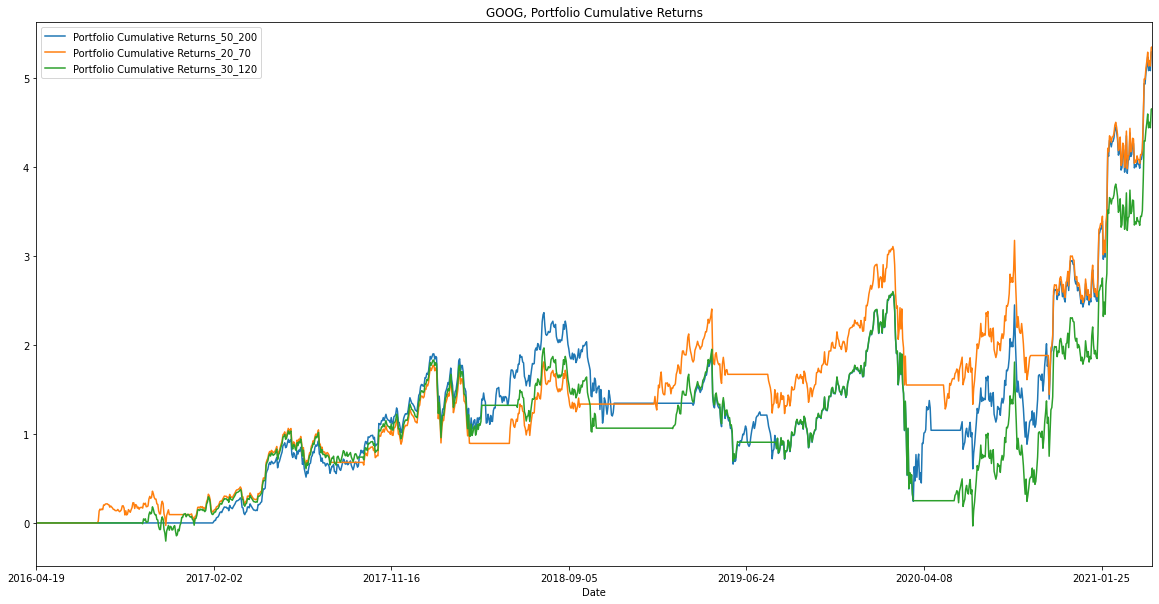

In [18]:
signals_df[['Portfolio Cumulative Returns_50_200','Portfolio Cumulative Returns_20_70', 'Portfolio Cumulative Returns_30_120']].plot(figsize=(20,10), title='GOOG, Portfolio Cumulative Returns');

### Prepare Portfolio Evaluation Metrics DataFrame

In [19]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest_50_200', 'Backtest_20_70', 'Backtest_30_120']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

Backtest_50_200 Backtest_20_70 Backtest_30_120
Annual Return                  NaN            NaN             NaN
Cumulative Returns             NaN            NaN             NaN
Annual Volatility              NaN            NaN             NaN
Sharpe Ratio                   NaN            NaN             NaN
Sortino Ratio                  NaN            NaN             NaN

### Calculate and Assign Portfolio Evaluation Metrics

In [20]:
# Calculate cumulative return
portfolio_evaluation_df.loc['Cumulative Returns'] = signals_df['Portfolio Cumulative Returns_50_200'][-1], signals_df['Portfolio Cumulative Returns_20_70'][-1], signals_df['Portfolio Cumulative Returns_30_120'][-1]


# Calculate annualized return
portfolio_evaluation_df.loc['Annual Return'] = (
    signals_df['Portfolio Daily Returns_50_200'].mean() * 252, 
    signals_df['Portfolio Daily Returns_20_70'].mean() * 252,
    signals_df['Portfolio Daily Returns_30_120'].mean() * 252
)

# Calculate annual volatility
portfolio_evaluation_df.loc['Annual Volatility'] = (
    signals_df['Portfolio Daily Returns_50_200'].std() * np.sqrt(252),
    signals_df['Portfolio Daily Returns_20_70'].std() * np.sqrt(252),
    signals_df['Portfolio Daily Returns_30_120'].std() * np.sqrt(252)
)

# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    signals_df['Portfolio Daily Returns_50_200'].mean() * 252) / (
    signals_df['Portfolio Daily Returns_50_200'].std() * np.sqrt(252)),(
    signals_df['Portfolio Daily Returns_20_70'].mean() * 252) / (
    signals_df['Portfolio Daily Returns_20_70'].std() * np.sqrt(252)),(
    signals_df['Portfolio Daily Returns_30_120'].mean() * 252) / (
    signals_df['Portfolio Daily Returns_30_120'].std() * np.sqrt(252)
)

# Calculate Downside Return
sortino_ratio_df_50_200 = signals_df[['Portfolio Daily Returns_50_200']].copy()
sortino_ratio_df_50_200.loc[:,'Downside Returns_50_200'] = 0

target_50_200 = 0
mask_50_200 = sortino_ratio_df_50_200['Portfolio Daily Returns_50_200'] < target_50_200
sortino_ratio_df_50_200.loc[mask_50_200, 'Downside Returns_50_200'] = sortino_ratio_df_50_200['Portfolio Daily Returns_50_200']**2
portfolio_evaluation_df

# Calculate Sortino Ratio
down_stdev_50_200 = np.sqrt(sortino_ratio_df_50_200['Downside Returns_50_200'].mean()) * np.sqrt(252)
expected_return_50_200 = sortino_ratio_df_50_200['Portfolio Daily Returns_50_200'].mean() * 252
sortino_ratio_50_200 = expected_return_50_200/down_stdev_50_200

# portfolio_evaluation_df.loc['Sortino Ratio_50_200'] = 

# Calculate Downside Return
sortino_ratio_df_20_70 = signals_df[['Portfolio Daily Returns_20_70']].copy()
sortino_ratio_df_20_70.loc[:,'Downside Returns_20_70'] = 0

target_20_70 = 0
mask_20_70 = sortino_ratio_df_20_70['Portfolio Daily Returns_20_70'] < target_20_70
sortino_ratio_df_20_70.loc[mask_20_70, 'Downside Returns_20_70'] = sortino_ratio_df_20_70['Portfolio Daily Returns_20_70']**2
portfolio_evaluation_df

# Calculate Sortino Ratio
down_stdev_20_70 = np.sqrt(sortino_ratio_df_20_70['Downside Returns_20_70'].mean()) * np.sqrt(252)
expected_return_20_70 = sortino_ratio_df_20_70['Portfolio Daily Returns_20_70'].mean() * 252
sortino_ratio_20_70 = expected_return_20_70/down_stdev_20_70

# portfolio_evaluation_df.loc['Sortino Ratio'] = 

# Calculate Downside Return
sortino_ratio_df_30_120 = signals_df[['Portfolio Daily Returns_30_120']].copy()
sortino_ratio_df_30_120.loc[:,'Downside Returns_30_120'] = 0

target_30_120 = 0
mask_30_120 = sortino_ratio_df_30_120['Portfolio Daily Returns_30_120'] < target_30_120
sortino_ratio_df_30_120.loc[mask_30_120, 'Downside Returns_30_120'] = sortino_ratio_df_30_120['Portfolio Daily Returns_30_120']**2
portfolio_evaluation_df

# Calculate Sortino Ratio
down_stdev_30_120 = np.sqrt(sortino_ratio_df_30_120['Downside Returns_30_120'].mean()) * np.sqrt(252)
expected_return_30_120 = sortino_ratio_df_30_120['Portfolio Daily Returns_30_120'].mean() * 252
sortino_ratio_30_120 = expected_return_30_120/down_stdev_30_120

portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio_50_200, sortino_ratio_20_70, sortino_ratio_30_120

portfolio_evaluation_df.head()

Backtest_50_200 Backtest_20_70 Backtest_30_120
Annual Return             0.587725        0.48845        0.585554
Cumulative Returns         5.29712        5.34915         4.65505
Annual Volatility         0.658603        0.48324        0.680868
Sharpe Ratio              0.892382        1.01078        0.860011
Sortino Ratio              1.29888        1.46393         1.21232

### Prepare Trade Evaluation Metrics DataFrame

In [21]:
# Initialize trade evaluation DataFrame with columns
trade_evaluation_df_50_200 = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss']
)

trade_evaluation_df_50_200

Empty DataFrame
Columns: [Stock, Entry Date, Exit Date, Shares, Entry Share Price, Exit Share Price, Entry Portfolio Holding, Exit Portfolio Holding, Profit/Loss]
Index: []

### Generating Trade Evaluation Metrics

In [22]:
# Initialize iterative variables
entry_date = ''
exit_date = ''
entry_portfolio_holding = 0
exit_portfolio_holding = 0
share_size = 0
entry_share_price = 0
exit_share_price = 0

# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Entry/Exit_50_200'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings_50_200'])
        share_size = row['Entry/Exit Position_50_200']
        entry_share_price = row['Close']

    elif row['Entry/Exit_50_200'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Entry/Exit Position_50_200'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df_50_200 = trade_evaluation_df_50_200.append(
            {
                'Stock': 'GOOG',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Print the DataFrame
trade_evaluation_df_50_200

Stock  Entry Date   Exit Date  Shares  Entry Share Price  Exit Share Price  Entry Portfolio Holding  Exit Portfolio Holding  Profit/Loss
0  GOOG  2017-02-01  2018-11-15   500.0         795.695007       1064.709961              397847.5035             532354.9805  -134507.477
1  GOOG  2019-03-27  2019-07-17   500.0        1173.020020       1146.349976              586510.0100             573174.9880    13335.022
2  GOOG  2019-07-26  2020-04-21   500.0        1250.410034       1216.339966              625205.0170             608169.9830    17035.034

In [23]:
# Initialize trade evaluation DataFrame with columns
trade_evaluation_df_20_70 = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss'])

### Generating Trade Evaluation Metrics

In [24]:
# Initialize iterative variables
entry_date = ''
exit_date = ''
entry_portfolio_holding = 0
exit_portfolio_holding = 0
share_size = 0
entry_share_price = 0
exit_share_price = 0

# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Entry/Exit_20_70'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings_20_70'])
        share_size = row['Entry/Exit Position_20_70']
        entry_share_price = row['Close']

    elif row['Entry/Exit_20_70'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Entry/Exit Position_20_70'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df_20_70 = trade_evaluation_df_20_70.append(
            {
                'Stock': 'GOOG',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Print the DataFrame
trade_evaluation_df_20_70

Stock  Entry Date   Exit Date  Shares  Entry Share Price  Exit Share Price  Entry Portfolio Holding  Exit Portfolio Holding  Profit/Loss
0  GOOG  2016-07-27  2016-11-18   500.0         741.770020        760.539978              370885.0100             380269.9890   -9384.9790
1  GOOG  2016-12-23  2017-08-10   500.0         789.909973        907.239990              394954.9865             453619.9950  -58665.0085
2  GOOG  2017-10-03  2018-03-05   500.0         957.789978       1090.930054              478894.9890             545465.0270  -66570.0380
3  GOOG  2018-03-06  2018-03-28   500.0        1095.060059       1004.559998              547530.0295             502279.9990   45250.0305
4  GOOG  2018-05-31  2018-09-24   500.0        1084.989990       1173.369995              542494.9950             586684.9975  -44190.0025
5  GOOG  2019-01-24  2019-05-23   500.0        1073.900024       1140.770020              536950.0120             570385.0100  -33434.9980
6  GOOG  2019-07-29  2020-03-11   500.0        1239.410034       1215.410034              619705.0170             607705.0170   12000.0000
7  GOOG  2020-05-11  2020-09-30   500.0        1403.260010       1469.599976              701630.0050             734799.9880  -33169.9830

In [25]:
# Initialize trade evaluation DataFrame with columns
trade_evaluation_df_30_120 = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss'])

### Generating Trade Evaluation Metrics

In [26]:
# Initialize iterative variables
entry_date = ''
exit_date = ''
entry_portfolio_holding = 0
exit_portfolio_holding = 0
share_size = 0
entry_share_price = 0
exit_share_price = 0

# Loop through signal DataFrame
# If `Entry/Exit` is 1, set entry trade metrics
# Else if `Entry/Exit` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Entry/Exit_30_120'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings_30_120'])
        share_size = row['Entry/Exit Position_30_120']
        entry_share_price = row['Close']

    elif row['Entry/Exit_30_120'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Entry/Exit Position_30_120'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df_30_120 = trade_evaluation_df_30_120.append(
            {
                'Stock': 'GOOG',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
            ignore_index=True)

# Print the DataFrame
trade_evaluation_df_30_120

Stock  Entry Date   Exit Date  Shares  Entry Share Price  Exit Share Price  Entry Portfolio Holding  Exit Portfolio Holding  Profit/Loss
0  GOOG  2016-10-06  2017-09-26   500.0         776.859985        924.859985              388429.9925             462429.9925  -74000.0000
1  GOOG  2017-10-03  2018-04-17   500.0         957.789978       1074.160034              478894.9890             537080.0170  -58185.0280
2  GOOG  2018-06-12  2018-10-18   500.0        1139.319946       1087.969971              569659.9730             543984.9855   25674.9875
3  GOOG  2019-02-22  2019-06-11   500.0        1110.369995       1078.719971              555184.9975             539359.9855   15825.0120
4  GOOG  2019-08-09  2020-03-23   500.0        1188.010010       1056.619995              594005.0050             528309.9975   65695.0075

---

### Create Hvplot Line Chart of Closing, SMA50, and SMA100

In [27]:
pricea_df = signals_df[['Close', 'SMA50', 'SMA200']]
pricea_chart = pricea_df.hvplot.line()
pricea_chart.opts(xaxis=None)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [28]:
priceb_df = signals_df[['Close', 'SMA20', 'SMA70']]
priceb_chart = priceb_df.hvplot.line()
priceb_chart.opts(xaxis=None)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [29]:
pricec_df = signals_df[['Close', 'SMA30', 'SMA120']]
pricec_chart = pricec_df.hvplot.line()
pricec_chart.opts(xaxis=None)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [30]:
cum_return = signals_df[['Portfolio Cumulative Returns_50_200','Portfolio Cumulative Returns_20_70', 'Portfolio Cumulative Returns_30_120']]
cum_ret_chart = cum_return.hvplot.line(
    ylabel='Cumulative Return',
    width=1000,
    height=400,
    title='GOOG, Portfolio Cumulatine Returns')
cum_ret_chart.opts(xaxis=None)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### Create Hvplot Table of Portfolio Metrics

In [31]:
portfolio_evaluation_df.reset_index(inplace=True)
portfolio_evaluation_table = portfolio_evaluation_df.hvplot.table(
    title = 'Portfolio Evaluation Metrics',
    width = 1000,
    height = 500)
portfolio_evaluation_table

:Table   [index,Backtest_50_200,Backtest_20_70,Backtest_30_120]

### Create Hvplot Table of Trade Metrics

In [32]:
trade_evaluation_table_a = trade_evaluation_df_50_200.hvplot.table()
trade_evaluation_table_a

:Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

In [33]:
trade_evaluation_table_b = trade_evaluation_df_20_70.hvplot.table()
trade_evaluation_table_b

:Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

In [34]:
trade_evaluation_table_c = trade_evaluation_df_30_120.hvplot.table()
trade_evaluation_table_c

:Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

### Build a Dashboard with `hvplot`

In [35]:
# Assemble dashboard visualization
display(Markdown("# Trading Dashboard"))
display(entry_exit_plot_50_200)
portfolio_evaluation_table + trade_evaluation_table_a

# Trading Dashboard

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

:Layout
   .Table.I  :Table   [index,Backtest_50_200,Backtest_20_70,Backtest_30_120]
   .Table.II :Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

In [36]:
# Assemble dashboard visualization
display(Markdown("# Trading Dashboard"))
display(entry_exit_plot_20_70)
portfolio_evaluation_table + trade_evaluation_table_b

# Trading Dashboard

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

:Layout
   .Table.I  :Table   [index,Backtest_50_200,Backtest_20_70,Backtest_30_120]
   .Table.II :Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

In [37]:
# Assemble dashboard visualization
display(Markdown("# Trading Dashboard"))
#display(pricea_chart)
display(entry_exit_plot_30_120)
portfolio_evaluation_table + trade_evaluation_table_c

# Trading Dashboard

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

:Layout
   .Table.I  :Table   [index,Backtest_50_200,Backtest_20_70,Backtest_30_120]
   .Table.II :Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

In [38]:
# Assemble dashboard visualization
display(Markdown("# GOOG"))
display(entry_exit_plot_50_200 + entry_exit_plot_20_70 + entry_exit_plot_30_120 )
display(cum_ret_chart + portfolio_evaluation_table )


# GOOG

:Layout
   .Overlay.I   :Overlay
      .Curve.I          :Curve   [Date]   (Close)
      .NdOverlay.I      :NdOverlay   [Variable]
         :Curve   [Date]   (value)
      .Scatter.Close.I  :Scatter   [Date]   (Close)
      .Scatter.Close.II :Scatter   [Date]   (Close)
   .Overlay.II  :Overlay
      .Curve.I          :Curve   [Date]   (Close)
      .NdOverlay.I      :NdOverlay   [Variable]
         :Curve   [Date]   (value)
      .Scatter.Close.I  :Scatter   [Date]   (Close)
      .Scatter.Close.II :Scatter   [Date]   (Close)
   .Overlay.III :Overlay
      .Curve.I          :Curve   [Date]   (Close)
      .NdOverlay.I      :NdOverlay   [Variable]
         :Curve   [Date]   (value)
      .Scatter.Close.I  :Scatter   [Date]   (Close)
      .Scatter.Close.II :Scatter   [Date]   (Close)

:Layout
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Table.I     :Table   [index,Backtest_50_200,Backtest_20_70,Backtest_30_120]